In [1]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as m

In [2]:
df = pd.read_csv('/Users/imee/Desktop/IVAN/pythonSA2/ratings.csv')
df1 = pd.read_csv('/Users/imee/Desktop/IVAN/pythonSA2/genome-scores.csv')
df2 = pd.read_csv('/Users/imee/Desktop/IVAN/pythonSA2/movies.csv')

In [3]:
df2[~df2.duplicated()]
df2.describe()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


# 1.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


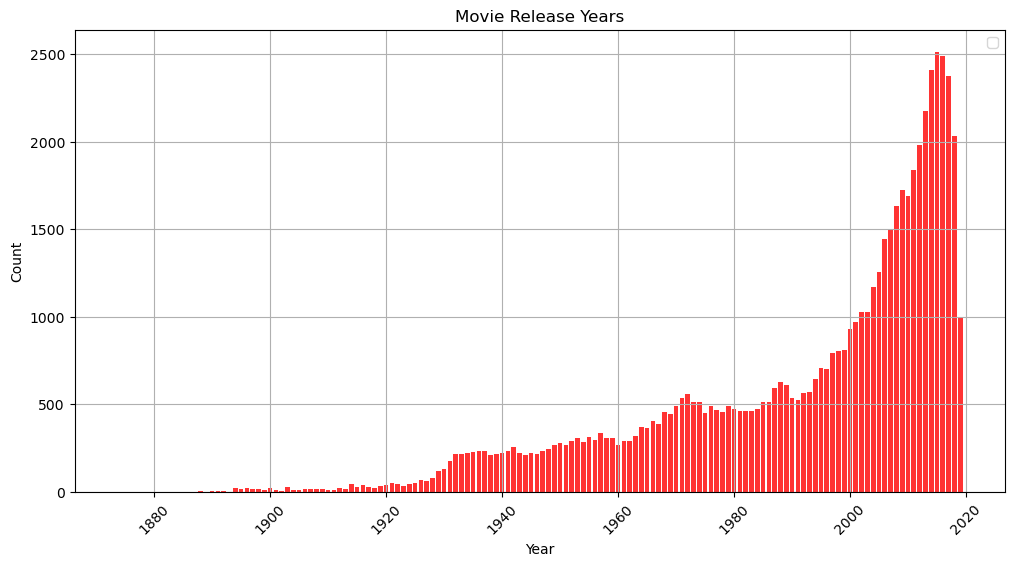

year
2015         NaN
2016   -0.009948
2014   -0.032958
2017   -0.013300
2013   -0.084667
          ...   
1883   -0.666667
1887    0.000000
1874    0.000000
1878    0.000000
1880    0.000000
Name: count, Length: 135, dtype: float64

In [4]:
df2['year'] = df2['title'].str.extract(r'\((\d{4})\)', expand=False)


df2['year'] = df2['year'].fillna('0')
df2['year'] = df2['year'].astype(int)
df2['year'].value_counts()
year_counts = df2['year'].value_counts()
year_counts = year_counts[year_counts.index != 0]

m.figure(figsize=(12, 6))
m.bar(year_counts.index, year_counts.values, color='r', alpha=0.8)
m.xlabel('Year')
m.ylabel('Count')
m.title('Movie Release Years')
m.xticks(rotation=45)
m.legend()
m.grid()
m.show()

year_counts.pct_change()

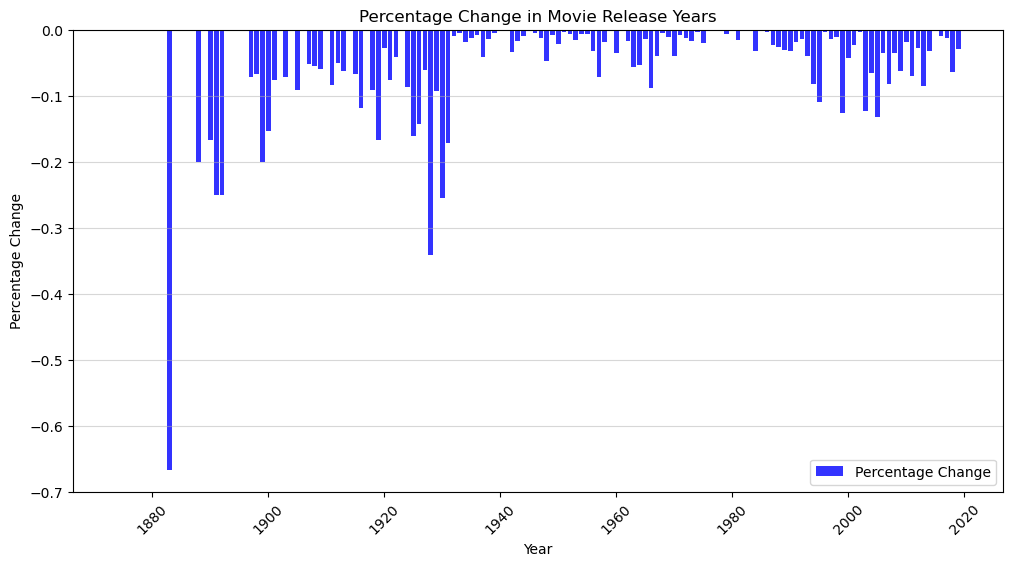

In [5]:
percent_change = year_counts.pct_change()
m.figure(figsize=(12, 6))
m.bar(percent_change.index, percent_change.values, color='b', alpha=0.8, linewidth=2)
m.xlabel('Year')
m.ylabel('Percentage Change')
m.title('Percentage Change in Movie Release Years')
m.xticks(rotation=45)
m.grid(axis='y', alpha=0.5)
m.legend(['Percentage Change'])
m.show()

# 2.

In [6]:
avg_ratings_df = df.groupby('movieId')['rating'].mean().reset_index()

avg_ratings_df = avg_ratings_df.rename(columns={'rating': 'avg_rating'})
merged_df = pd.merge(avg_ratings_df, df2, on='movieId')
merged_df['genres'] = merged_df['genres'].str.split('|')
exploded_df = merged_df.explode('genres')
genre_counts_df = exploded_df.groupby('genres').size().reset_index(name='count')
top_genre = genre_counts_df.loc[genre_counts_df['count'].idxmax()]

print(f"The most popular genre is: {top_genre['genres']} with {top_genre['count']} movies")

The most popular genre is: Drama with 24465 movies


# 3.

In [7]:
avg_ratings_df = df.groupby('movieId')['rating'].mean().reset_index()



# Extract the year from the title column
df2['year'] = df2['year'].fillna('0')
df2['year'] = df2['year'].astype(int)
# Split the genre column into separate genres
df2['genres'] = df2['genres'].str.split('|')

merged_df = pd.merge(avg_ratings_df, df2, on='movieId')
filtered_df = merged_df[merged_df['rating'] >= 4.0]
genre_counts_df = filtered_df.explode('genres').groupby(['year', 'genres']).size().reset_index(name='count')
top_genres_df = genre_counts_df.sort_values(['year', 'count'], ascending=[True, False]).drop_duplicates('year')

print(top_genres_df)

      year              genres  count
0        0  (no genres listed)     60
13    1900  (no genres listed)      4
14    1903  (no genres listed)      1
15    1904  (no genres listed)      1
16    1905  (no genres listed)      1
...    ...                 ...    ...
1145  2015               Drama     83
1162  2016               Drama     88
1178  2017               Drama     90
1194  2018               Drama     78
1210  2019               Drama     33

[105 rows x 3 columns]


Taste in movies does change but really gradually.

In [11]:
avg_ratings_df = df.groupby('movieId')['rating'].mean().reset_index()
avg_ratings_df = avg_ratings_df.rename(columns={'rating': 'avg_rating'})
merged_df = pd.merge(df2, avg_ratings_df, on='movieId')
top_movies = merged_df.sort_values('avg_rating', ascending=False).head(20)
print("Top 20 Movies:")
for i, row in top_movies.iterrows():
    print(f"{i+1}. {row['title']} ({row['avg_rating']:.1f})")

Top 20 Movies:
29524. The Girl is in Trouble (2015) (5.0)
49655. A Gift Horse (2015) (5.0)
29644. The Perfect Neighbor (2005) (5.0)
49042. Relentless (2018) (5.0)
29647. The Perfect Wife (2001) (5.0)
54557. The Harrow (2016) (5.0)
49053. Devil's Whisper (2017) (5.0)
29652. Perfect Child (2007) (5.0)
29653. The Rival (2006) (5.0)
29654. A Job to Kill For (2006) (5.0)
29659. Twisted Desire (1996) (5.0)
54499. From Other Worlds (2004) (5.0)
29666. Stranger in My House (1999) (5.0)
37905. Courage (2009) (5.0)
54473. Alien Rising (2013) (5.0)
54469. Nowhere Mind (2018) (5.0)
49152. Joy Road (2011) (5.0)
54438. I Am JFK Jr. (2016) (5.0)
37891. La Soif du Monde (2012) (5.0)
29685. HottieBoombaLottie (2008) (5.0)
